In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('../DataSets/winequality-red.csv')

label =  np.unique(raw_data['quality'])
label

array([3, 4, 5, 6, 7, 8], dtype=int64)

# Pre-processing

In [ ]:
sns.countplot(raw_data['quality'])

In [ ]:
for i in raw_data:
    sns.distplot(raw_data[i])
    plt.show()

### Most of the data belongs from 5th and 6th class

In [ ]:
def heatmap(x):
    plt.figure(figsize=(10,10))
    sns.heatmap(x.corr() , annot=True ,cmap='coolwarm' , square=True , fmt= ".2f")
    plt.show()

In [3]:
train_data = raw_data.iloc[ : int(raw_data.shape[0] * .75) , :]
test_data = raw_data.iloc[int(raw_data.shape[0] * .75) : , :]
train_data_labels = train_data['quality']
test_data_labels = test_data['quality']
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
del train_data['quality'] , test_data['quality']

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 11 )
zz = (pca.fit_transform(train_data))
x = np.argmax(pca.components_ , axis = 1 )
print(train_data.columns)
print(x)
train_data.iloc[:,x].head()


In [ ]:
# 6 is the idices of train_data which tell us that it has highest variance and if PCA try to reduce the dimention than 
# it's first prefer choice is that idices feature of training data
pca = PCA(n_components = 5 )
pca.fit_transform(train_data)
np.argmax(pca.components_ , axis = 1 )

In [ ]:
sns.countplot(train_data_labels)

In [ ]:
sns.countplot(test_data_labels)

In [ ]:
print("%.40f"%np.linalg.det(train_data.cov()))
c = train_data.columns.tolist()
c.remove('chlorides')
c.remove('pH')
c.remove('citric acid')

In [ ]:
print("%.20f"%np.linalg.det(train_data[c].cov()))
train_data[c].cov()

In [5]:
# Standardize data
train_data_normalize = ((train_data - np.mean(train_data)) / np.std(train_data))
test_data_normalize = ((test_data - np.mean(test_data)) / np.std(test_data))
train_data_normalize.head()

train_data_normalize2 = (train_data[c] - np.mean(train_data[c])) / np.std(train_data[c])

NameError: name 'c' is not defined

In [6]:
train_data_normalize = np.array(train_data_normalize)
train_data_labels = np.array(train_data_labels)

test_data_normalize = np.array(test_data_normalize)
test_data_labels = np.array(test_data_labels)

train_data_normalize2 = np.array(train_data_normalize2)

NameError: name 'train_data_normalize2' is not defined

In [104]:
class NeuralNetwork():
    
    def __init__(self,lmda = 0):
        
        self.input_layer_n   = 11
        self.hidden_layer1_n = 12
        self.hidden_layer2_n = 12
        self.hidden_layer3_n = 12
        self.hidden_layer4_n = 12
        self.hidden_layer5_n = 12
        self.output_layer = 6
        self.lmda = lmda
        self.label_length = 6
        
        self.theta_layer1 = np.random.randn(self.input_layer_n   , self.hidden_layer1_n)
        self.theta_layer2 = np.random.randn(self.hidden_layer1_n , self.hidden_layer2_n)
        self.theta_layer3 = np.random.randn(self.hidden_layer2_n , self.hidden_layer3_n)
        self.theta_layer4 = np.random.randn(self.hidden_layer3_n , self.hidden_layer4_n)
        self.theta_layer5 = np.random.randn(self.hidden_layer4_n , self.hidden_layer5_n)
        self.theta_layer6 = np.random.randn(self.hidden_layer5_n , self.output_layer)
        
        self.bias1 = np.random.randn(self.hidden_layer1_n)
        self.bias2 = np.random.randn(self.hidden_layer2_n)
        self.bias3 = np.random.randn(self.hidden_layer3_n)
        self.bias4 = np.random.randn(self.hidden_layer4_n)
        self.bias5 = np.random.randn(self.hidden_layer5_n)
        self.bias6 = np.random.randn(self.output_layer)
       
        
    def one_hot_label(self , data , label_length):
        one_hot_labels = np.zeros((data.shape[0] , label_length))
        for i in range(data.shape[0]):  
            one_hot_labels[i, data[i]-3 ] = 1  # our labels is 3,4,5,6,7,8 is we subtract by 3 it is 0,1,2,3,4,5
        return one_hot_labels


    def softmax(self , activation , theta , bias):
        exp = np.exp( np.dot( activation , theta )  + bias )
        denominator = np.sum( exp , axis = 1)
        s = list(map(lambda i : exp[:,i] / denominator , np.arange(self.label_length)))
        return np.array(s).T
        
    def sigmoid(self, activation , theta , bias):
        return 1 / (1 + np.exp(np.dot(activation , theta)))

    def forwardPropagation(self,X):
        self.activation_layer_0 = X
        self.activation_layer_1 = self.sigmoid(self.activation_layer_0 , self.theta_layer1 , self.bias1)
        self.activation_layer_2 = self.sigmoid(self.activation_layer_1 , self.theta_layer2 , self.bias2)
        self.activation_layer_3 = self.sigmoid(self.activation_layer_2 , self.theta_layer3 , self.bias3)
        self.activation_layer_4 = self.sigmoid(self.activation_layer_3 , self.theta_layer4 , self.bias4)
        self.activation_layer_5 = self.sigmoid(self.activation_layer_4 , self.theta_layer5 , self.bias5)
        self.activation_layer_6 = self.softmax(self.activation_layer_5 , self.theta_layer6 , self.bias6)
        
        return self.activation_layer_6
        
    def costFunction(self,X,y):
        ''' Provide labels as "Y" '''
        self.y = self.one_hot_label( y , self.label_length)
        self.y_cap = self.forwardPropagation(X)
        return -np.sum(self.y * np.log(self.y_cap))
     
    
    def costFunctionDerivative(self,X,y):
        self.y_cap = self.forwardPropagation(X)
        dA1_dtheta_layer_1 = self.activation_layer_1 * ( 1-self.activation_layer_1 )   
        dA2_dtheta_layer_2 = self.activation_layer_2 * ( 1-self.activation_layer_2 )
        dA3_dtheta_layer_3 = self.activation_layer_3 * ( 1-self.activation_layer_3 ) # derivative w.r.t all layers activation
        dA4_dtheta_layer_4 = self.activation_layer_4 * ( 1-self.activation_layer_4 )
        dA5_dtheta_layer_5 = self.activation_layer_5 * ( 1-self.activation_layer_5 )
        
        self.target_y = self.one_hot_label(y , self.label_length)
        
        dL_dA6 = (self.y_cap - self.target_y)
        dL_dA5 = np.dot( dL_dA6 , self.theta_layer6.T )
        dL_dA4 = np.dot( dL_dA5 * dA5_dtheta_layer_5 ,self.theta_layer5.T )
        dL_dA3 = np.dot( dL_dA4 * dA4_dtheta_layer_4 ,self.theta_layer4.T )
        dL_dA2 = np.dot( dL_dA3 * dA3_dtheta_layer_3 ,self.theta_layer3.T )
        dL_dA1 = np.dot( dL_dA2 * dA2_dtheta_layer_2 ,self.theta_layer2.T  )
        
        
        dL_dtheta_layer_6 =  1/X.shape[0] * (np.dot(self.activation_layer_5.T , dL_dA6)) 
        dL_dtheta_layer_5 =  1/X.shape[0] * (np.dot(self.activation_layer_4.T , dA5_dtheta_layer_5 * dL_dA5))
        dL_dtheta_layer_4 =  1/X.shape[0] * (np.dot(self.activation_layer_3.T , dA4_dtheta_layer_4 * dL_dA4))
        dL_dtheta_layer_3 =  1/X.shape[0] * (np.dot(self.activation_layer_2.T , dA3_dtheta_layer_3 * dL_dA3))
        dL_dtheta_layer_2 =  1/X.shape[0] * (np.dot(self.activation_layer_1.T , dA2_dtheta_layer_2 * dL_dA2))
        dL_dtheta_layer_1 =  1/X.shape[0] * (np.dot(self.activation_layer_0.T , dA1_dtheta_layer_1 * dL_dA1))       
        
        dL_dbias6 =  1/X.shape[0] * (np.dot(1 , dL_dA6)) 
        dL_dbias5 =  1/X.shape[0] * (np.dot(1 , dA5_dtheta_layer_5 * dL_dA5))
        dL_dbias4 =  1/X.shape[0] * (np.dot(1 , dA4_dtheta_layer_4 * dL_dA4))
        dL_dbias3 =  1/X.shape[0] * (np.dot(1 , dA3_dtheta_layer_3 * dL_dA3))
        dL_dbias2 =  1/X.shape[0] * (np.dot(1 , dA2_dtheta_layer_2 * dL_dA2))
        dL_dbias1 =  1/X.shape[0] * (np.dot(1 , dA1_dtheta_layer_1 * dL_dA1))
        
        
        return dL_dtheta_layer_1, dL_dtheta_layer_2, dL_dtheta_layer_3 , dL_dtheta_layer_4 , dL_dtheta_layer_5 , dL_dtheta_layer_6 , dL_dbias1 , dL_dbias2 , dL_dbias3 , dL_dbias4 , dL_dbias5 , dL_dbias6
      

In [105]:
def gradientDecent(NN , X , y,batch):
    alpha = 0.01
    epsilon = 0.001
    i = 1
    itera = []
    csfun = []
    while i < 5000:
        index = np.random.randint(0 , X.shape[0] , size=(batch,))
        
        initial_cost = NN.costFunction(X[index] , y[index] )
        
        theta1 , theta2 , theta3 , theta4, theta5 , theta6 , bias1 , bias2 , bias3 , bias4 , bias5 , bias6 = NN.costFunctionDerivative(X[index], y[index] )
        
        NN.theta_layer1 -=  alpha * theta1
        NN.theta_layer2 -=  alpha * theta2
        NN.theta_layer3 -=  alpha * theta3
        NN.theta_layer4 -=  alpha * theta4
        NN.theta_layer5 -=  alpha * theta5
        NN.theta_layer6 -=  alpha * theta6
        
        NN.bias1 -= alpha * bias1.sum(axis =0)
        NN.bias2 -= alpha * bias2.sum(axis =0)
        NN.bias3 -= alpha * bias3.sum(axis =0)
        NN.bias4 -= alpha * bias4.sum(axis =0)
        NN.bias5 -= alpha * bias5.sum(axis =0)
        NN.bias6 -= alpha * bias6.sum(axis =0)
        
        
        final_cost = NN.costFunction(X[index] , y[index])
        
        #if abs(final_cost - initial_cost) < epsilon:
         #   break
        print('Iteration {} Initial cost {} final cost {}'.format(i , initial_cost , final_cost))    
        
        itera.append(i)
        csfun.append(final_cost)
        i+=1
    return itera , csfun

In [106]:
NN = NeuralNetwork()
itera , csfun = gradientDecent(NN , train_data_normalize , train_data_labels , 64)

Iteration 1 Initial cost 236.88098332755447 final cost 236.06628851418796
Iteration 2 Initial cost 242.0431613910937 final cost 241.20090071746077
Iteration 3 Initial cost 248.5349302924671 final cost 247.67094193046077
Iteration 4 Initial cost 260.7758756574975 final cost 259.93267296654176
Iteration 5 Initial cost 252.18292869163628 final cost 251.26544666848417
Iteration 6 Initial cost 219.6711290884943 final cost 218.8544397930206
Iteration 7 Initial cost 234.61424118557198 final cost 233.89730899935756
Iteration 8 Initial cost 260.8366032407563 final cost 259.9128874590133
Iteration 9 Initial cost 214.42310513357015 final cost 213.72005678206332
Iteration 10 Initial cost 246.05950727005182 final cost 245.23268849296778
Iteration 11 Initial cost 232.2373533262689 final cost 231.46999332709632
Iteration 12 Initial cost 251.17160986654363 final cost 250.3574624555963
Iteration 13 Initial cost 225.6706873790052 final cost 225.02105206089257
Iteration 14 Initial cost 236.00733255567275

Iteration 163 Initial cost 154.315719998368 final cost 153.66827848002177
Iteration 164 Initial cost 142.16206515045008 final cost 141.6233974472462
Iteration 165 Initial cost 143.44904169694024 final cost 142.9567552867448
Iteration 166 Initial cost 135.1149669451984 final cost 134.6957967342256
Iteration 167 Initial cost 136.74515904657386 final cost 136.2394179540445
Iteration 168 Initial cost 153.68148542343425 final cost 153.0202532042387
Iteration 169 Initial cost 146.60430646488032 final cost 145.99002131883452
Iteration 170 Initial cost 135.97971930882326 final cost 135.4152562677319
Iteration 171 Initial cost 140.5917874447081 final cost 140.06085149342024
Iteration 172 Initial cost 128.5097436221905 final cost 128.0476033185261
Iteration 173 Initial cost 138.61541035566586 final cost 138.17308497689214
Iteration 174 Initial cost 139.58038807799576 final cost 139.04478715184504
Iteration 175 Initial cost 150.79291550489384 final cost 150.19924768670845
Iteration 176 Initial co

Iteration 279 Initial cost 96.58769614607813 final cost 96.33434791213364
Iteration 280 Initial cost 94.52192584581982 final cost 94.42381193086749
Iteration 281 Initial cost 98.9213736094042 final cost 98.62939983090995
Iteration 282 Initial cost 102.03588781439606 final cost 101.7247706641885
Iteration 283 Initial cost 94.95370690926157 final cost 94.757904456628
Iteration 284 Initial cost 96.76563451273512 final cost 96.49022559333913
Iteration 285 Initial cost 91.27748938398906 final cost 91.08980375049096
Iteration 286 Initial cost 94.65133159274929 final cost 94.42567853203485
Iteration 287 Initial cost 102.95440446183908 final cost 102.64719463273157
Iteration 288 Initial cost 94.47905667832279 final cost 94.20068774311241
Iteration 289 Initial cost 93.09048942676543 final cost 92.87507982065546
Iteration 290 Initial cost 101.36127892663745 final cost 101.11257555269033
Iteration 291 Initial cost 99.40535441206022 final cost 99.05561854125374
Iteration 292 Initial cost 95.276108

Iteration 438 Initial cost 84.62888763945905 final cost 84.61911081155978
Iteration 439 Initial cost 75.71501770673171 final cost 75.65684170419924
Iteration 440 Initial cost 77.51427332540766 final cost 77.45183033537049
Iteration 441 Initial cost 84.21368223823882 final cost 84.19128250033162
Iteration 442 Initial cost 85.50520635696262 final cost 85.43011535284995
Iteration 443 Initial cost 77.13145143871142 final cost 77.09080817291837
Iteration 444 Initial cost 87.1808500533547 final cost 87.11215893881469
Iteration 445 Initial cost 81.77158726743045 final cost 81.74272274239011
Iteration 446 Initial cost 84.04658109041783 final cost 84.01530942956015
Iteration 447 Initial cost 78.60089187943342 final cost 78.51560661093113
Iteration 448 Initial cost 78.70301176249612 final cost 78.66563365980949
Iteration 449 Initial cost 86.48167998291532 final cost 86.46183389167201
Iteration 450 Initial cost 78.76404848992638 final cost 78.73551600993612
Iteration 451 Initial cost 74.198069124

Iteration 600 Initial cost 78.93372262413959 final cost 78.92501749973529
Iteration 601 Initial cost 73.50514874053331 final cost 73.48262916766055
Iteration 602 Initial cost 88.28023497964352 final cost 88.24909351535632
Iteration 603 Initial cost 75.33769925570067 final cost 75.32207552525611
Iteration 604 Initial cost 77.76219221165432 final cost 77.7172612283801
Iteration 605 Initial cost 73.62167911757207 final cost 73.60002937699664
Iteration 606 Initial cost 78.09074761859839 final cost 78.00168329042096
Iteration 607 Initial cost 79.60202892373303 final cost 79.59125598089538
Iteration 608 Initial cost 80.26906487957064 final cost 80.2411930193889
Iteration 609 Initial cost 78.07562081939625 final cost 78.05156298809734
Iteration 610 Initial cost 74.37004292326851 final cost 74.32973937337111
Iteration 611 Initial cost 73.78457948230468 final cost 73.76727553800065
Iteration 612 Initial cost 68.02810248834552 final cost 67.99006360004616
Iteration 613 Initial cost 77.3543158279

Iteration 763 Initial cost 72.7636846926863 final cost 72.73150116722007
Iteration 764 Initial cost 82.95390760846534 final cost 82.94153300439179
Iteration 765 Initial cost 78.01743065144073 final cost 77.97864203375116
Iteration 766 Initial cost 77.20306979909967 final cost 77.18523055812386
Iteration 767 Initial cost 77.06012974619341 final cost 77.05414845018045
Iteration 768 Initial cost 82.98784146749435 final cost 82.98468596130951
Iteration 769 Initial cost 76.37307402866134 final cost 76.3558336434035
Iteration 770 Initial cost 80.22991660203526 final cost 80.1937901543979
Iteration 771 Initial cost 69.9786281856527 final cost 69.95383643860276
Iteration 772 Initial cost 74.12238555724547 final cost 74.11155961893193
Iteration 773 Initial cost 72.52565802397373 final cost 72.51390397113224
Iteration 774 Initial cost 74.06657684269467 final cost 74.06043949154184
Iteration 775 Initial cost 76.57004062975997 final cost 76.55134432593205
Iteration 776 Initial cost 80.681515351082

Iteration 921 Initial cost 74.43043850640933 final cost 74.42576897478324
Iteration 922 Initial cost 70.49710326569189 final cost 70.48341843216303
Iteration 923 Initial cost 70.05181677626508 final cost 70.00284842651209
Iteration 924 Initial cost 74.10647786220308 final cost 74.10198365594685
Iteration 925 Initial cost 88.45227053613112 final cost 88.389842641214
Iteration 926 Initial cost 90.23433930799604 final cost 90.2197246583981
Iteration 927 Initial cost 73.14336963316539 final cost 73.13352540433311
Iteration 928 Initial cost 79.51655574784752 final cost 79.48810310769493
Iteration 929 Initial cost 81.6616245009013 final cost 81.65855392761982
Iteration 930 Initial cost 75.7271296197829 final cost 75.6827710915877
Iteration 931 Initial cost 86.6627148155027 final cost 86.64961406653572
Iteration 932 Initial cost 75.42633014575395 final cost 75.40324424266308
Iteration 933 Initial cost 75.55475945788235 final cost 75.5509570081026
Iteration 934 Initial cost 86.85589689719316 f

Iteration 1089 Initial cost 80.41460484500794 final cost 80.40654486042976
Iteration 1090 Initial cost 86.26274035990316 final cost 86.25473466378551
Iteration 1091 Initial cost 85.36878404433655 final cost 85.35680102682993
Iteration 1092 Initial cost 73.63721057214465 final cost 73.63125177065692
Iteration 1093 Initial cost 77.9873769905252 final cost 77.98013365441291
Iteration 1094 Initial cost 75.66608197172667 final cost 75.66054556437169
Iteration 1095 Initial cost 73.78841127100532 final cost 73.78531510934747
Iteration 1096 Initial cost 76.7804226950931 final cost 76.76742102053065
Iteration 1097 Initial cost 83.95953753798601 final cost 83.95114937939188
Iteration 1098 Initial cost 74.91225797317199 final cost 74.89395099869951
Iteration 1099 Initial cost 82.85210350413479 final cost 82.83815441132782
Iteration 1100 Initial cost 78.47239732678622 final cost 78.46136152296674
Iteration 1101 Initial cost 69.85526716362855 final cost 69.84395528972708
Iteration 1102 Initial cost

Iteration 1249 Initial cost 70.08136986441707 final cost 70.04364738276784
Iteration 1250 Initial cost 84.09593335291197 final cost 84.08328932650667
Iteration 1251 Initial cost 75.76217398060845 final cost 75.74349799826749
Iteration 1252 Initial cost 77.00581628830864 final cost 77.00341956979523
Iteration 1253 Initial cost 82.69621517779618 final cost 82.67559204424825
Iteration 1254 Initial cost 71.1103748029912 final cost 71.10577836031028
Iteration 1255 Initial cost 75.23049981921694 final cost 75.21955393952385
Iteration 1256 Initial cost 73.83412305290918 final cost 73.82791999523153
Iteration 1257 Initial cost 65.09281689985913 final cost 65.06174149681092
Iteration 1258 Initial cost 72.43516136936476 final cost 72.41509684752945
Iteration 1259 Initial cost 78.97586270907844 final cost 78.88138574612393
Iteration 1260 Initial cost 73.65358718644902 final cost 73.64457845902075
Iteration 1261 Initial cost 72.49821649051616 final cost 72.49424314591461
Iteration 1262 Initial cos

Iteration 1414 Initial cost 70.4367111868655 final cost 70.37070459661808
Iteration 1415 Initial cost 87.65134726779934 final cost 87.63697435144526
Iteration 1416 Initial cost 75.09585836668242 final cost 75.09012829416224
Iteration 1417 Initial cost 69.47587314656056 final cost 69.45991931363352
Iteration 1418 Initial cost 78.75769760709609 final cost 78.73161428413563
Iteration 1419 Initial cost 78.0852351557866 final cost 78.0647320558868
Iteration 1420 Initial cost 72.7011447531786 final cost 72.67173733584798
Iteration 1421 Initial cost 75.51969964137814 final cost 75.5068670208653
Iteration 1422 Initial cost 71.86879685059509 final cost 71.85190560335286
Iteration 1423 Initial cost 73.9020099285973 final cost 73.84530108712255
Iteration 1424 Initial cost 72.30122142501392 final cost 72.26164855405803
Iteration 1425 Initial cost 74.32290630474165 final cost 74.30829012051653
Iteration 1426 Initial cost 70.73841090591759 final cost 70.7238843257028
Iteration 1427 Initial cost 70.0

Iteration 1583 Initial cost 73.88892257681707 final cost 73.87177216409454
Iteration 1584 Initial cost 80.99933091138831 final cost 80.9774593307861
Iteration 1585 Initial cost 84.0988702848701 final cost 84.0607811919117
Iteration 1586 Initial cost 68.57960801589076 final cost 68.57240759429166
Iteration 1587 Initial cost 71.72344571470795 final cost 71.71578539447489
Iteration 1588 Initial cost 70.9032455879293 final cost 70.85661613757097
Iteration 1589 Initial cost 81.28698827201501 final cost 81.26511939401729
Iteration 1590 Initial cost 88.82853574934417 final cost 88.81557450729207
Iteration 1591 Initial cost 77.4123626203733 final cost 77.40897951052119
Iteration 1592 Initial cost 79.8082204388821 final cost 79.7855299347618
Iteration 1593 Initial cost 87.80567154511957 final cost 87.76817479953394
Iteration 1594 Initial cost 67.87660897665006 final cost 67.86175425067046
Iteration 1595 Initial cost 79.57905796756134 final cost 79.57265944817468
Iteration 1596 Initial cost 85.3

Iteration 1747 Initial cost 72.5835338587339 final cost 72.57545520822916
Iteration 1748 Initial cost 78.36350408205368 final cost 78.35360734795994
Iteration 1749 Initial cost 72.88258752481056 final cost 72.87747985248768
Iteration 1750 Initial cost 76.4523148753963 final cost 76.45021712744428
Iteration 1751 Initial cost 77.81722405609432 final cost 77.81263396343692
Iteration 1752 Initial cost 80.30322474277003 final cost 80.29296243108307
Iteration 1753 Initial cost 74.97028085473983 final cost 74.9608050503547
Iteration 1754 Initial cost 65.6011821374108 final cost 65.56758229782267
Iteration 1755 Initial cost 84.62717138820568 final cost 84.6033804178822
Iteration 1756 Initial cost 77.6874783779632 final cost 77.68511892042538
Iteration 1757 Initial cost 76.93668854021993 final cost 76.93043833398514
Iteration 1758 Initial cost 73.68378906501309 final cost 73.6747840732425
Iteration 1759 Initial cost 82.21823666436487 final cost 82.2147282581538
Iteration 1760 Initial cost 80.28

Iteration 1911 Initial cost 82.09325883900917 final cost 82.06273193955651
Iteration 1912 Initial cost 78.6010651776352 final cost 78.56323634605614
Iteration 1913 Initial cost 74.01092412144898 final cost 73.93706556821567
Iteration 1914 Initial cost 81.1797926376763 final cost 81.17252178389067
Iteration 1915 Initial cost 79.9099006783473 final cost 79.88969224333303
Iteration 1916 Initial cost 80.49393359080722 final cost 80.48825412941889
Iteration 1917 Initial cost 78.85133214130784 final cost 78.84719902372026
Iteration 1918 Initial cost 74.76139741194945 final cost 74.75620521684007
Iteration 1919 Initial cost 70.54168171789382 final cost 70.53574032254474
Iteration 1920 Initial cost 80.4173812588286 final cost 80.36656794011361
Iteration 1921 Initial cost 73.0269709527374 final cost 72.997500523242
Iteration 1922 Initial cost 70.95414432166747 final cost 70.87501890158349
Iteration 1923 Initial cost 75.55192814334697 final cost 75.48937193911992
Iteration 1924 Initial cost 77.5

Iteration 2077 Initial cost 72.05209538038739 final cost 72.04270522267456
Iteration 2078 Initial cost 67.22867525595541 final cost 67.21773009586792
Iteration 2079 Initial cost 85.06553648111912 final cost 85.04774160265558
Iteration 2080 Initial cost 71.8907706259666 final cost 71.88384330915835
Iteration 2081 Initial cost 75.9359297849347 final cost 75.91717014247345
Iteration 2082 Initial cost 72.06032335704796 final cost 72.0485884233882
Iteration 2083 Initial cost 71.05943024307831 final cost 71.04223671522377
Iteration 2084 Initial cost 87.2900601694678 final cost 87.27443399996422
Iteration 2085 Initial cost 84.5722436071323 final cost 84.55852674702109
Iteration 2086 Initial cost 76.52131898172371 final cost 76.51777364464209
Iteration 2087 Initial cost 67.4800208499506 final cost 67.46504530501929
Iteration 2088 Initial cost 85.4904342854851 final cost 85.47244183714929
Iteration 2089 Initial cost 81.85122502544581 final cost 81.77242265704872
Iteration 2090 Initial cost 80.0

Iteration 2238 Initial cost 78.15396972984911 final cost 78.13342317841989
Iteration 2239 Initial cost 75.65895217052687 final cost 75.64262340134394
Iteration 2240 Initial cost 80.68988574831451 final cost 80.6874220529983
Iteration 2241 Initial cost 72.68269012577937 final cost 72.66933461834523
Iteration 2242 Initial cost 65.50676655373744 final cost 65.48839695083572
Iteration 2243 Initial cost 75.67188439842666 final cost 75.6620233369243
Iteration 2244 Initial cost 76.34609300726204 final cost 76.34358895199043
Iteration 2245 Initial cost 80.25369918851176 final cost 80.22614987314752
Iteration 2246 Initial cost 83.08376506866179 final cost 83.07415563758953
Iteration 2247 Initial cost 72.65042367721952 final cost 72.59432014671214
Iteration 2248 Initial cost 70.50278380955783 final cost 70.49696464824636
Iteration 2249 Initial cost 77.8404503263897 final cost 77.83849274434164
Iteration 2250 Initial cost 76.90294670817067 final cost 76.88871583254618
Iteration 2251 Initial cost 

Iteration 2392 Initial cost 71.22858050115167 final cost 71.21535019917097
Iteration 2393 Initial cost 73.06269741302869 final cost 73.03957175886289
Iteration 2394 Initial cost 72.78517165119962 final cost 72.7636978092039
Iteration 2395 Initial cost 90.10949513788418 final cost 89.98087107670416
Iteration 2396 Initial cost 72.73435301469812 final cost 72.72592875554888
Iteration 2397 Initial cost 79.07742404708765 final cost 79.06553892336161
Iteration 2398 Initial cost 79.89034973617242 final cost 79.86149434096045
Iteration 2399 Initial cost 69.2807375631195 final cost 69.27719693608518
Iteration 2400 Initial cost 67.18291147458687 final cost 67.13889481966794
Iteration 2401 Initial cost 81.4370645004195 final cost 81.39855888903209
Iteration 2402 Initial cost 85.62597022129106 final cost 85.61059045333516
Iteration 2403 Initial cost 82.04781463747275 final cost 82.02183178534008
Iteration 2404 Initial cost 75.98045147627718 final cost 75.95810425595135
Iteration 2405 Initial cost 

Iteration 2544 Initial cost 78.37771330727301 final cost 78.33427669742709
Iteration 2545 Initial cost 76.38612542066262 final cost 76.38166867940025
Iteration 2546 Initial cost 79.55868313669451 final cost 79.5560197767926
Iteration 2547 Initial cost 80.51049946283749 final cost 80.49016998519005
Iteration 2548 Initial cost 81.96655986420274 final cost 81.94451324617282
Iteration 2549 Initial cost 74.17819725671285 final cost 74.16065618041496
Iteration 2550 Initial cost 81.74847342878675 final cost 81.72035118558229
Iteration 2551 Initial cost 72.86284850281262 final cost 72.84773540364968
Iteration 2552 Initial cost 65.8557408077629 final cost 65.84494707334957
Iteration 2553 Initial cost 78.82861165837173 final cost 78.82280213788296
Iteration 2554 Initial cost 80.18201075659141 final cost 80.10093994814757
Iteration 2555 Initial cost 77.03655707131855 final cost 76.98232657986622
Iteration 2556 Initial cost 65.45141976575725 final cost 65.43731718325469
Iteration 2557 Initial cost

Iteration 2704 Initial cost 78.3715646826927 final cost 78.33583339647342
Iteration 2705 Initial cost 81.22945344767452 final cost 81.21942286725749
Iteration 2706 Initial cost 78.46701871385406 final cost 78.46450815527359
Iteration 2707 Initial cost 81.0404957704444 final cost 81.02988796250139
Iteration 2708 Initial cost 79.43018701398708 final cost 79.42107932432268
Iteration 2709 Initial cost 69.81741535037612 final cost 69.79519849286152
Iteration 2710 Initial cost 77.29560066874953 final cost 77.2747894138179
Iteration 2711 Initial cost 74.7030034558795 final cost 74.6978592454137
Iteration 2712 Initial cost 71.13315314330303 final cost 71.07870578614228
Iteration 2713 Initial cost 79.66952081025414 final cost 79.64587658857332
Iteration 2714 Initial cost 75.12178916181993 final cost 75.07168701760573
Iteration 2715 Initial cost 83.99071146177128 final cost 83.96152673431621
Iteration 2716 Initial cost 84.74135073763193 final cost 84.72307393992205
Iteration 2717 Initial cost 87

Iteration 2871 Initial cost 68.33735796652998 final cost 68.26192001058779
Iteration 2872 Initial cost 69.82549772513468 final cost 69.77002981760516
Iteration 2873 Initial cost 73.21092678337646 final cost 73.20545912791124
Iteration 2874 Initial cost 76.54866314445181 final cost 76.50817136820504
Iteration 2875 Initial cost 77.32762890119918 final cost 77.3258892092087
Iteration 2876 Initial cost 71.17941872236717 final cost 71.15460788372692
Iteration 2877 Initial cost 80.97294964188438 final cost 80.96029405977052
Iteration 2878 Initial cost 68.95301210688363 final cost 68.94794625930729
Iteration 2879 Initial cost 76.34756668814947 final cost 76.2570659528586
Iteration 2880 Initial cost 77.13134544765728 final cost 77.09372419073947
Iteration 2881 Initial cost 67.70770320971886 final cost 67.70034520532019
Iteration 2882 Initial cost 79.19307053511508 final cost 79.14007814128485
Iteration 2883 Initial cost 79.06547677244419 final cost 79.04597973327505
Iteration 2884 Initial cost

Iteration 3028 Initial cost 73.50603467919001 final cost 73.49358674498899
Iteration 3029 Initial cost 79.00242013980912 final cost 78.98443208229148
Iteration 3030 Initial cost 68.35948745494079 final cost 68.34415600886058
Iteration 3031 Initial cost 75.71364625144881 final cost 75.69638918036543
Iteration 3032 Initial cost 85.43795295963616 final cost 85.42790707074067
Iteration 3033 Initial cost 70.67232047049336 final cost 70.6571535671917
Iteration 3034 Initial cost 72.59657476309829 final cost 72.58477173715013
Iteration 3035 Initial cost 79.58806596589213 final cost 79.56165732973804
Iteration 3036 Initial cost 81.24557862997852 final cost 81.23240564608547
Iteration 3037 Initial cost 68.41922822973865 final cost 68.41472637646481
Iteration 3038 Initial cost 74.64500527823117 final cost 74.55113413945793
Iteration 3039 Initial cost 87.77325912917344 final cost 87.75749877573175
Iteration 3040 Initial cost 71.6155300388937 final cost 71.60857265543248
Iteration 3041 Initial cost

Iteration 3194 Initial cost 80.05651679864316 final cost 80.0150253757975
Iteration 3195 Initial cost 84.20346022385422 final cost 84.17682315492166
Iteration 3196 Initial cost 79.23438078589504 final cost 79.23080185234622
Iteration 3197 Initial cost 66.75515459350324 final cost 66.72641634908558
Iteration 3198 Initial cost 70.14564778935713 final cost 70.12852338228126
Iteration 3199 Initial cost 80.40634054434324 final cost 80.37469965702222
Iteration 3200 Initial cost 73.93099852821243 final cost 73.92202058574489
Iteration 3201 Initial cost 80.9771933752275 final cost 80.93156434082121
Iteration 3202 Initial cost 70.29193762277426 final cost 70.2559219326902
Iteration 3203 Initial cost 78.60770192568876 final cost 78.58701311866584
Iteration 3204 Initial cost 75.23817411273141 final cost 75.23468495829576
Iteration 3205 Initial cost 69.13059496662662 final cost 69.11707098816399
Iteration 3206 Initial cost 68.21616771933805 final cost 68.12664880736153
Iteration 3207 Initial cost 

Iteration 3350 Initial cost 77.97349900922183 final cost 77.95266609891075
Iteration 3351 Initial cost 73.05243615758393 final cost 73.03810663190396
Iteration 3352 Initial cost 81.67077551728974 final cost 81.62242008097878
Iteration 3353 Initial cost 81.67836855842073 final cost 81.67307266571578
Iteration 3354 Initial cost 82.99162870514094 final cost 82.97428799719735
Iteration 3355 Initial cost 76.59866896114312 final cost 76.57081807986172
Iteration 3356 Initial cost 79.5920462331106 final cost 79.53450106954281
Iteration 3357 Initial cost 73.7247102356545 final cost 73.70508521380869
Iteration 3358 Initial cost 71.75598913807525 final cost 71.7521123006673
Iteration 3359 Initial cost 77.74009927271729 final cost 77.73706073126266
Iteration 3360 Initial cost 78.93655193808458 final cost 78.91034504379768
Iteration 3361 Initial cost 86.02609419509288 final cost 86.01585485262157
Iteration 3362 Initial cost 77.4043403786122 final cost 77.39387130483811
Iteration 3363 Initial cost 7

Iteration 3513 Initial cost 71.32664728759065 final cost 71.31413607348964
Iteration 3514 Initial cost 68.36021928235522 final cost 68.35652858406468
Iteration 3515 Initial cost 73.98756023871688 final cost 73.98403248575927
Iteration 3516 Initial cost 65.2056188917039 final cost 65.15010879206592
Iteration 3517 Initial cost 83.14566401774813 final cost 83.13140065783031
Iteration 3518 Initial cost 72.02370035459661 final cost 72.01364876964024
Iteration 3519 Initial cost 71.26897563800387 final cost 71.26686392638078
Iteration 3520 Initial cost 65.10362911514927 final cost 65.02762248297236
Iteration 3521 Initial cost 87.08464793676316 final cost 87.07614536534872
Iteration 3522 Initial cost 71.7989644894962 final cost 71.79414139096556
Iteration 3523 Initial cost 74.10334181488213 final cost 74.08567911098888
Iteration 3524 Initial cost 79.91730169025007 final cost 79.88132652098277
Iteration 3525 Initial cost 78.34997785247215 final cost 78.33924061948318
Iteration 3526 Initial cost

Iteration 3686 Initial cost 76.82068027575559 final cost 76.81775915401793
Iteration 3687 Initial cost 81.31549093902144 final cost 81.27638696465146
Iteration 3688 Initial cost 89.39071882215546 final cost 89.34878144767634
Iteration 3689 Initial cost 79.59190356637785 final cost 79.54063431694718
Iteration 3690 Initial cost 79.44520483904103 final cost 79.42573774860038
Iteration 3691 Initial cost 80.95856937187258 final cost 80.90879572991301
Iteration 3692 Initial cost 82.26125306546794 final cost 82.23961843913142
Iteration 3693 Initial cost 70.71249619959399 final cost 70.68572279145991
Iteration 3694 Initial cost 74.54914165117198 final cost 74.54596992795061
Iteration 3695 Initial cost 73.84040606544748 final cost 73.78677903917351
Iteration 3696 Initial cost 80.32013716675829 final cost 80.30544626021823
Iteration 3697 Initial cost 69.89858610314823 final cost 69.85334024794238
Iteration 3698 Initial cost 88.70777306722499 final cost 88.68434220542527
Iteration 3699 Initial co

Iteration 3847 Initial cost 74.4889064265088 final cost 74.48240941314309
Iteration 3848 Initial cost 70.54548228675569 final cost 70.53555742783969
Iteration 3849 Initial cost 64.17145351626857 final cost 64.08756245124773
Iteration 3850 Initial cost 82.30204959674772 final cost 82.26951480606661
Iteration 3851 Initial cost 85.09936552451937 final cost 85.01523069481321
Iteration 3852 Initial cost 80.62414044498483 final cost 80.62143628651381
Iteration 3853 Initial cost 75.00641897040408 final cost 74.99838228576118
Iteration 3854 Initial cost 82.15867317548998 final cost 82.13430021877585
Iteration 3855 Initial cost 85.13406638124728 final cost 85.11189569908939
Iteration 3856 Initial cost 89.7440910440824 final cost 89.72965829930516
Iteration 3857 Initial cost 75.26217623597876 final cost 75.25366827899205
Iteration 3858 Initial cost 76.91686780603112 final cost 76.79903850117668
Iteration 3859 Initial cost 80.43580168351727 final cost 80.42268106951153
Iteration 3860 Initial cost

Iteration 4009 Initial cost 72.0890844751754 final cost 72.08100804501137
Iteration 4010 Initial cost 74.91268639584703 final cost 74.87703272626747
Iteration 4011 Initial cost 76.84850212052933 final cost 76.83626062803904
Iteration 4012 Initial cost 84.03871740985008 final cost 84.0026265085593
Iteration 4013 Initial cost 76.24078413743331 final cost 76.21939028790672
Iteration 4014 Initial cost 72.361923088617 final cost 72.34994310003034
Iteration 4015 Initial cost 79.10415966257341 final cost 79.08962273395193
Iteration 4016 Initial cost 71.94987833307542 final cost 71.94663509726232
Iteration 4017 Initial cost 74.78477912434131 final cost 74.72671306139347
Iteration 4018 Initial cost 71.14889572252412 final cost 71.14314784216836
Iteration 4019 Initial cost 65.88136761844893 final cost 65.83375678496273
Iteration 4020 Initial cost 64.05714582814404 final cost 64.02941156120227
Iteration 4021 Initial cost 79.89670150973618 final cost 79.86545846554817
Iteration 4022 Initial cost 8

Iteration 4171 Initial cost 78.19616145153546 final cost 78.17224029465318
Iteration 4172 Initial cost 77.91390360308577 final cost 77.90279727452887
Iteration 4173 Initial cost 66.21611631012958 final cost 66.11077448391282
Iteration 4174 Initial cost 78.26674315460406 final cost 78.24900084327422
Iteration 4175 Initial cost 82.30287840562166 final cost 82.30061515932388
Iteration 4176 Initial cost 74.27456648789685 final cost 74.23727624808909
Iteration 4177 Initial cost 68.05725134812849 final cost 68.04978205639796
Iteration 4178 Initial cost 81.46665316711064 final cost 81.46392411118738
Iteration 4179 Initial cost 72.77571990671369 final cost 72.75737666507703
Iteration 4180 Initial cost 75.11103458568181 final cost 75.10974732694993
Iteration 4181 Initial cost 72.99181053717535 final cost 72.96526989676039
Iteration 4182 Initial cost 67.47450966826932 final cost 67.43551061347455
Iteration 4183 Initial cost 82.58125231937927 final cost 82.57136411211533
Iteration 4184 Initial co

Iteration 4337 Initial cost 77.87269663442294 final cost 77.82378255147214
Iteration 4338 Initial cost 71.0506215604966 final cost 71.04707895666068
Iteration 4339 Initial cost 67.73367538641244 final cost 67.72693118654922
Iteration 4340 Initial cost 78.31069005542764 final cost 78.30878433655157
Iteration 4341 Initial cost 78.03043929191978 final cost 78.02016849855536
Iteration 4342 Initial cost 71.3732769620067 final cost 71.35518539349536
Iteration 4343 Initial cost 80.21018133963642 final cost 80.2043730674856
Iteration 4344 Initial cost 75.71759148232567 final cost 75.71184781906253
Iteration 4345 Initial cost 72.16759890883078 final cost 72.1644792259255
Iteration 4346 Initial cost 78.66972590873917 final cost 78.65918783877778
Iteration 4347 Initial cost 64.8989314526853 final cost 64.88220412227633
Iteration 4348 Initial cost 72.53385128373014 final cost 72.52074933240863
Iteration 4349 Initial cost 74.92659166671326 final cost 74.91620894837484
Iteration 4350 Initial cost 79

Iteration 4507 Initial cost 83.50540002047703 final cost 83.45305100714238
Iteration 4508 Initial cost 76.77104246642017 final cost 76.76765151803887
Iteration 4509 Initial cost 72.40050927709763 final cost 72.38288461016066
Iteration 4510 Initial cost 73.86000230714329 final cost 73.85655983721551
Iteration 4511 Initial cost 70.91780313229721 final cost 70.91138610128613
Iteration 4512 Initial cost 88.59259294617198 final cost 88.57521340517125
Iteration 4513 Initial cost 73.03294966905564 final cost 72.9959161229755
Iteration 4514 Initial cost 82.02934098685625 final cost 81.97752278778522
Iteration 4515 Initial cost 81.19429752423514 final cost 81.1695130941687
Iteration 4516 Initial cost 68.91093634306397 final cost 68.893949675964
Iteration 4517 Initial cost 64.01817271907166 final cost 63.99306668615398
Iteration 4518 Initial cost 74.40087805991912 final cost 74.38453991540123
Iteration 4519 Initial cost 81.30641039590998 final cost 81.28230721459995
Iteration 4520 Initial cost 7

Iteration 4668 Initial cost 71.82828677900844 final cost 71.78029626648012
Iteration 4669 Initial cost 72.91694243348621 final cost 72.91501940459497
Iteration 4670 Initial cost 74.14404828427907 final cost 74.12471370787733
Iteration 4671 Initial cost 71.80816618757055 final cost 71.80392507035373
Iteration 4672 Initial cost 77.72258287983162 final cost 77.70485079947525
Iteration 4673 Initial cost 76.67781286893864 final cost 76.67497369210167
Iteration 4674 Initial cost 79.79894087005935 final cost 79.755859188068
Iteration 4675 Initial cost 75.29708984933643 final cost 75.26259465804699
Iteration 4676 Initial cost 79.7185807352376 final cost 79.70477481929187
Iteration 4677 Initial cost 75.49847634295001 final cost 75.49331012323191
Iteration 4678 Initial cost 75.0897425925877 final cost 75.08528612220567
Iteration 4679 Initial cost 69.97873651157877 final cost 69.9274029584804
Iteration 4680 Initial cost 78.62873318009845 final cost 78.62737201178521
Iteration 4681 Initial cost 65

Iteration 4827 Initial cost 75.64566407782289 final cost 75.62955386987093
Iteration 4828 Initial cost 67.67748931754944 final cost 67.66936300211339
Iteration 4829 Initial cost 71.90895374146231 final cost 71.90403911561864
Iteration 4830 Initial cost 74.53751641717875 final cost 74.52135799979034
Iteration 4831 Initial cost 80.59977882602192 final cost 80.59504012267975
Iteration 4832 Initial cost 74.62569315356984 final cost 74.6046186667934
Iteration 4833 Initial cost 80.99328409741415 final cost 80.98804449387075
Iteration 4834 Initial cost 72.5248757951203 final cost 72.51429193648147
Iteration 4835 Initial cost 75.02127136034491 final cost 74.99274947798565
Iteration 4836 Initial cost 72.94346171736757 final cost 72.91806961841584
Iteration 4837 Initial cost 71.35757833919072 final cost 71.34658765866475
Iteration 4838 Initial cost 80.7360137858169 final cost 80.67143621012812
Iteration 4839 Initial cost 83.53860788783811 final cost 83.41430708430903
Iteration 4840 Initial cost 

Iteration 4991 Initial cost 84.21864699651466 final cost 84.20896810135136
Iteration 4992 Initial cost 70.87093419678416 final cost 70.86380204020645
Iteration 4993 Initial cost 68.5302188828923 final cost 68.52036965110231
Iteration 4994 Initial cost 74.44255429767338 final cost 74.43900803482622
Iteration 4995 Initial cost 78.73327359881179 final cost 78.71395893061835
Iteration 4996 Initial cost 82.61266610199266 final cost 82.58663085793657
Iteration 4997 Initial cost 80.6484186590657 final cost 80.63029619975053
Iteration 4998 Initial cost 70.43611045141199 final cost 70.3929450472822
Iteration 4999 Initial cost 87.26450904656414 final cost 87.2456796893616


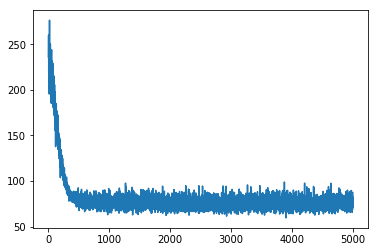

In [107]:
plt.plot(itera , csfun)

In [108]:
qq = (np.argmax(NN.forwardPropagation(train_data_normalize) , axis=1) +3)
co=0
for i in range(len(train_data_labels)):
    if qq[i] == train_data_labels[i]:
        co+=1
print('accuracy :')
print((co/len(train_data_labels))*100)

accuracy :
40.200166805671394


In [109]:
qq = (np.argmax(NN.forwardPropagation(test_data_normalize) , axis=1) +3)
co=0
for i in range(len(test_data_labels)):
    if qq[i] == test_data_labels[i]:
        co+=1
print('accuracy : ')
print((co/len(test_data_labels))*100)

accuracy : 
47.5


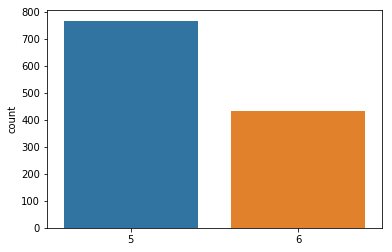

In [32]:
z  = (np.argmax(NN.forwardPropagation(train_data_normalize) , axis=1) + 3) 
sns.countplot(z)

In [33]:
qq = pd.DataFrame([(np.argmax(NN.forwardPropagation(train_data_normalize) , axis =1 )+3) , train_data_labels]  ).T
qq.columns = ['predicted','actual']
qq.head()

,predicted,actual
0,5,5
1,5,5
2,5,5
3,6,6
4,5,5


Accuracy    method    feature_select

40-50%    batch(32)       8

45-50%    batch(32)       11( all )

In [84]:
np.random.rand(5,5)

array([[0.82455301, 0.71730702, 0.07681612, 0.13860541, 0.91888368],
       [0.03674182, 0.71920416, 0.63519881, 0.32222387, 0.79607539],
       [0.04669096, 0.10462144, 0.49755165, 0.24423807, 0.57064259],
       [0.37703271, 0.27959979, 0.05001681, 0.68967316, 0.83009199],
       [0.33201345, 0.7093506 , 0.33963283, 0.52036861, 0.88486639]])